We first start by importing necessary packages we need for this project.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

Now, we import the data from the link first link into 'train_data', and see what are the columns and columns types of the data. From cell 4-15 are all for Question 1.

In [7]:
train_data = pd.read_csv("http://mozbi-sr-data-science.s3.amazonaws.com/data/moz_customer_data_train.csv", sep='|', index_col=False)
print(train_data.columns)
print(train_data.dtypes)
print(train_data.describe())
print(train_data.shape)

Index(['id', 'industry', 'geography', 'most_common_browser',
       'session_time_prior_month_seconds', 'prior_month_paid'],
      dtype='object')
id                                    int64
industry                             object
geography                            object
most_common_browser                  object
session_time_prior_month_seconds      int64
prior_month_paid                    float64
dtype: object
                 id  session_time_prior_month_seconds  prior_month_paid
count  4.800000e+04                      48000.000000      48000.000000
mean   4.997442e+09                       1952.151854         85.624461
std    2.896754e+09                       2579.835645         32.754654
min    3.134830e+05                          1.000000          0.040000
25%    2.481218e+09                        612.000000         63.845328
50%    4.993512e+09                       1210.000000         87.822595
75%    7.516707e+09                       2289.000000        111.080471

Now, we see columns "industry", "geography", and "most_common_browser" are object types. We have to investigate to see what are the unique vaues of these columns. I start with industry column.

In [8]:
print(train_data['industry'].unique())

[nan 'healthcare' 'health care' 'marketing agency' 'Marketing Agency'
 'software' 'unknown' 'unk' 'mktg agency']


As we see, there are inconsistency in the column, for example "marketing agency" has 3 versions, I will make all of them to be "marketing agency", this way the data will be consistent. I also, changed all the NAs and Unknowns to "Uknown" so that we have string type for all the values in column 'unknown'

In [9]:
train_data['industry'].replace('health care', 'healthcare', inplace=True)
train_data['industry'].replace('Marketing Agency', 'marketing agency', inplace=True)
train_data['industry'].replace('mktg agency', 'marketing agency', inplace=True)
train_data['industry'].replace('unk', 'unknown', inplace=True)
train_data['industry'].replace(np.nan, 'unknown', inplace=True)

Now we would like to see how "industry" is among different customers in data.

['unknown' 'healthcare' 'marketing agency' 'software']
(array(['healthcare', 'marketing agency', 'software', 'unknown'],
      dtype=object), array([11963, 18095,  5879, 12063]))


Text(0.5, 1.0, 'Industry categories')

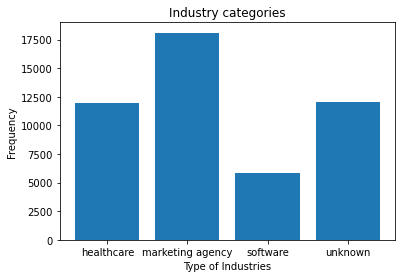

In [10]:
print(train_data['industry'].unique())
industry = train_data['industry']
unique_industries = np.unique(industry, return_counts=True)
print(unique_industries)

plt.figure()
plt.bar(unique_industries[0],unique_industries[1])
plt.xlabel('Type of Industries')
plt.ylabel('Frequency')
plt.title('Industry categories')
# plt.show()

As we see, Marketing Agency is most popular inudstry among customers.
Now, we do the same for "geography" column.

In [11]:
print(train_data['geography'].unique())
train_data['geography'].replace('US', 'United States', inplace=True)
train_data['geography'].replace('USA', 'United States', inplace=True)
train_data['geography'].replace('America', 'United States', inplace=True)
train_data['geography'].replace('CA', 'Canada', inplace=True)
train_data['geography'].replace('GB', 'United Kingdom', inplace=True)
train_data['geography'].replace('UK', 'United Kingdom', inplace=True)
train_data['geography'].replace('England', 'United Kingdom', inplace=True)
train_data['geography'].replace('Esp', 'Spain', inplace=True)
#after cleaning up the column
print(train_data['geography'].unique())

['GB' 'US' 'Canada' 'Greece' 'USA' 'CA' 'America' 'United States' 'Esp'
 'UK' 'India' 'Pakistan' 'United Kingdom' 'England' 'France' 'Spain']
['United Kingdom' 'United States' 'Canada' 'Greece' 'Spain' 'India'
 'Pakistan' 'France']


Now we would like to see what "geograhy" areas are most popular among different customers in the data.

(array(['Canada', 'France', 'Greece', 'India', 'Pakistan', 'Spain',
       'United Kingdom', 'United States'], dtype=object), array([10709,  1739,  1782,  1773,  1797,  3483,  5260, 21457]))


Text(0.5, 1.0, 'Geography Areas')

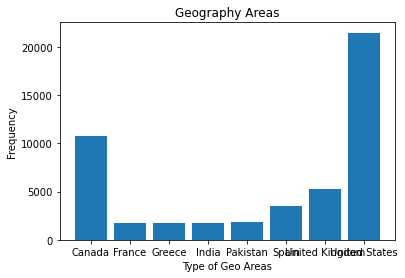

In [12]:
geography = train_data['geography']
unique_geo = np.unique(geography, return_counts=True)
print(unique_geo)

plt.figure()
plt.bar(unique_geo[0],unique_geo[1])
plt.xlabel('Type of Geo Areas')
plt.ylabel('Frequency')
plt.title('Geography Areas')
# plt.show()

As we see, United Staes has the highest number of customers in the data.

Now, we do the same for "most_common_browser" column, and make necessary changes.

['Chrome' 'Firefox' 'IE' 'Safari']
(array(['Chrome', 'Firefox', 'IE', 'Safari'], dtype=object), array([24194,  7921,  7935,  7950]))


Text(0.5, 1.0, 'Web Browsers Categories')

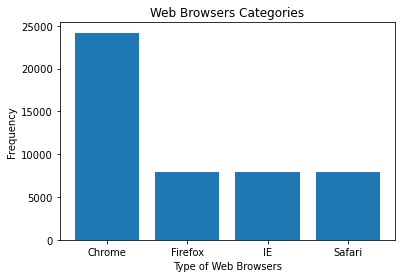

In [13]:
print(train_data['most_common_browser'].unique())
browser = train_data['most_common_browser']
unique_browser = np.unique(browser, return_counts=True)
print(unique_browser)

plt.figure()
plt.bar(unique_browser[0],unique_browser[1])
plt.xlabel('Type of Web Browsers')
plt.ylabel('Frequency')
plt.title('Web Browsers Categories')
# plt.show()

Now we have to convert the categorical columns to dummy variables using "LabelEncoder" function.

In [14]:
train_data['industry'] = LabelEncoder().fit_transform(train_data['industry'])
train_data['geography'] = LabelEncoder().fit_transform(train_data['geography'])
train_data['most_common_browser'] = LabelEncoder().fit_transform(train_data['most_common_browser'])

Now that all of the columns are numerical, we can draw Correlation Matrix and see how differet columns are associated to each oter.

<AxesSubplot:>

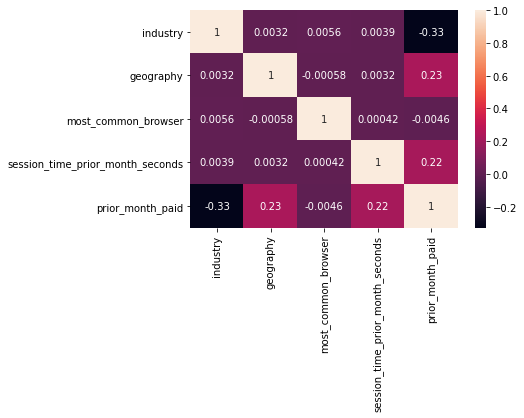

In [15]:
plt.figure()
corr_data = train_data[['industry', 'geography', 'most_common_browser', 'session_time_prior_month_seconds','prior_month_paid']]
sns.heatmap(corr_data.corr(), annot = True)
# plt.show()

As we see from the above correlation Matrix, "Prior_month_paid" has the highest positive correlation with "geography" and "session_time_prior_month_seconds". From here, we start Question 2, first we have to devide the data into target("prior_month_paid") and features(other columns).

Here we calculate Q1, Q3, IQR and find out which records are outliers, then we remove the outliers from the data.

In [16]:
Q1 = train_data.quantile(0.25)
Q3 = train_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
print((train_data < (Q1 - 1.5 * IQR)) | (train_data > (Q3 + 1.5 * IQR)))
train_data = train_data[~((train_data < (Q1 - 1.5 * IQR)) | (train_data > (Q3 + 1.5 * IQR))).any(axis=1)]
# print data shape after removing the outliers
print(train_data.shape)

id                                  5.035489e+09
industry                            2.000000e+00
geography                           6.000000e+00
most_common_browser                 2.000000e+00
session_time_prior_month_seconds    1.677000e+03
prior_month_paid                    4.723514e+01
dtype: float64
          id  industry  geography  most_common_browser  \
0      False     False      False                False   
1      False     False      False                False   
2      False     False      False                False   
3      False     False      False                False   
4      False     False      False                False   
...      ...       ...        ...                  ...   
47995  False     False      False                False   
47996  False     False      False                False   
47997  False     False      False                False   
47998  False     False      False                False   
47999  False     False      False                Fals

Now, We divide our dataset into training and test, we use "StandardScalar" to standardize our features so that we have them in a standard scale.

In [17]:
target = train_data.prior_month_paid.values
features = train_data.drop(['id', 'prior_month_paid'], axis=1).values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

Question 2. We run the Linear Regression model on the data.

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

feature = train_data.drop(['id','prior_month_paid'], axis=1)
lm = LinearRegression()
model = lm.fit(X_train, y_train)
lr_pred = lm.predict(X_test)

Question 3. We look for inferential interpretation of the above model for Question 3.

In [20]:
print('Linear Regression MAE:', metrics.mean_absolute_error(y_test, lr_pred))
print('Linear Regression MSE:', metrics.mean_squared_error(y_test, lr_pred))
print('Linear Regression RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))
print("Linear Regression R-squared for train: %.2f" %lm.score(X_train, y_train))
print("Linear Regression R-squared for test: %.2f" %lm.score(X_test, y_test))
lr_coeffecients = pd.DataFrame(lm.coef_,feature.columns)
lr_coeffecients.columns = ['Linear Regression Coeffecient']
print(lr_coeffecients)

Linear Regression MAE: 23.787992884717966
Linear Regression MSE: 836.6442482065523
Linear Regression RMSE: 28.92480333911628
Linear Regression R-squared for train: 0.21
Linear Regression R-squared for test: 0.20
                                  Linear Regression Coeffecient
industry                                             -11.058259
geography                                              7.423101
most_common_browser                                    0.155183
session_time_prior_month_seconds                       6.860563


Now, we use the scatterplot to see how the prediction and real values are distributed.

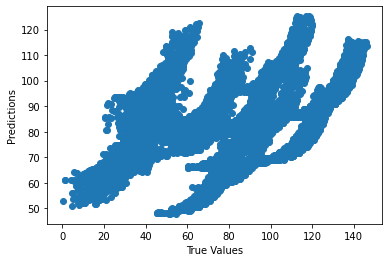

In [21]:
## The line / model
plt.figure()
plt.scatter(y_test, lr_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

Now, we look at Linear Regression coefficients to see how different features are affecting target values.

In [22]:
lr_coeffecients = pd.DataFrame(model.coef_,feature.columns)
lr_coeffecients.columns = ['Linear Regression Coeffecient']
print(lr_coeffecients)

                                  Linear Regression Coeffecient
industry                                             -11.058259
geography                                              7.423101
most_common_browser                                    0.155183
session_time_prior_month_seconds                       6.860563


As we see from the above, "industry" has negative effect on our target ("prior_month_paid"), and the model is most affected by "geography" and "session_time_prior_month_seconds" which we also noticed in the correlation matrix.

Question 4. We start with importing the new data, and cleaning it in the same way as we did for the training data file above.

In [23]:
test_data = pd.read_csv("http://mozbi-sr-data-science.s3.amazonaws.com/data/moz_customer_data_test.csv", sep='|', index_col=False)
print(test_data.columns)
print(test_data.dtypes)
print(test_data.describe())
print(test_data.shape)

Index(['id', 'industry', 'geography', 'most_common_browser',
       'session_time_prior_month_seconds', 'prior_month_paid'],
      dtype='object')
id                                    int64
industry                             object
geography                            object
most_common_browser                  object
session_time_prior_month_seconds      int64
prior_month_paid                    float64
dtype: object
                 id  session_time_prior_month_seconds  prior_month_paid
count  1.200000e+04                      12000.000000      12000.000000
mean   4.976514e+09                       1934.527583         84.983463
std    2.877893e+09                       2523.557970         32.957244
min    5.550730e+05                          1.000000          0.080000
25%    2.486958e+09                        607.000000         62.517315
50%    4.974383e+09                       1097.000000         86.870033
75%    7.441363e+09                       2284.000000        110.642275

We do the same cleaning process as we did for training data. first, we start with industry column.

In [24]:
print(test_data['industry'].unique())
test_data['industry'].replace('health care', 'healthcare', inplace=True)
test_data['industry'].replace('Marketing Agency', 'marketing agency', inplace=True)
test_data['industry'].replace('mktg agency', 'marketing agency', inplace=True)
test_data['industry'].replace('unk', 'unknown', inplace=True)
test_data['industry'].replace(np.nan, 'unknown', inplace=True)

['health care' 'unk' 'Marketing Agency' nan 'software' 'mktg agency'
 'healthcare' 'unknown' 'marketing agency']


After cleaning, the unique values of the industry column will be:

In [25]:
print(test_data['industry'].unique())
industry_test = train_data['industry']
unique_industries_test = np.unique(industry_test, return_counts=True)
print(unique_industries_test)

['healthcare' 'unknown' 'marketing agency' 'software']
(array([0, 1, 2, 3]), array([11001, 16546,  5369, 11020]))


Now, we clean the Geography column as follows:

In [26]:
print(test_data['geography'].unique())
test_data['geography'].replace('US', 'United States', inplace=True)
test_data['geography'].replace('USA', 'United States', inplace=True)
test_data['geography'].replace('America', 'United States', inplace=True)
test_data['geography'].replace('CA', 'Canada', inplace=True)
test_data['geography'].replace('GB', 'United Kingdom', inplace=True)
test_data['geography'].replace('UK', 'United Kingdom', inplace=True)
test_data['geography'].replace('England', 'United Kingdom', inplace=True)
test_data['geography'].replace('Esp', 'Spain', inplace=True)
print(test_data['geography'].unique())
geography_test = test_data['geography']
unique_geo_test = np.unique(geography_test, return_counts=True)
print(unique_geo_test)

['America' 'England' 'Esp' 'USA' 'Greece' 'CA' 'GB' 'India' 'US'
 'United States' 'France' 'UK' 'Pakistan' 'Canada' 'Spain'
 'United Kingdom']
['United States' 'United Kingdom' 'Spain' 'Greece' 'Canada' 'India'
 'France' 'Pakistan']
(array(['Canada', 'France', 'Greece', 'India', 'Pakistan', 'Spain',
       'United Kingdom', 'United States'], dtype=object), array([2539,  448,  437,  483,  472,  930, 1345, 5346]))


Now, we convert our categorical columns "industry", "geography" and "most_common_browsers" to numerical values.

In [27]:
test_data['industry'] = LabelEncoder().fit_transform(test_data['industry'])
test_data['geography'] = LabelEncoder().fit_transform(test_data['geography'])
test_data['most_common_browser'] = LabelEncoder().fit_transform(test_data['most_common_browser'])

Here, we devide the new data into target and feature sets, then we use standard scaler to standardize the values. We use test_size to be 99% of the data since we want to see how the model works on the new data.

In [42]:
target_test = test_data.prior_month_paid.values
features_test = test_data.drop(['id', 'prior_month_paid'], axis=1).values
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(features_test, target_test, test_size=0.99, random_state=1)
X_train_new, X_val_new, y_train_new, y_val_new = train_test_split(X_train_new, y_train_new, test_size=1, random_state=1)
X_train_new_train = sc.fit_transform(X_train_new)
X_val_new = sc.transform(X_val_new)
X_test_new = sc.transform(X_test_new)

We then run the model on the new data.

In [43]:
# run the linear regression model on the new data
lr_pred_test = model.predict(X_test_new)

Here are the statistical metrics of the model on new data:

In [44]:
print('Linear Regression MAE:', metrics.mean_absolute_error(y_test_new, lr_pred_test))
print('Linear Regression MSE:', metrics.mean_squared_error(y_test_new, lr_pred_test))
print('Linear Regression RMSE:', np.sqrt(metrics.mean_squared_error(y_test_new, lr_pred_test)))
print("Linear Regression R-squared for test: %.2f" %model.score(X_test_new, y_test_new))

Linear Regression MAE: 24.898270047927884
Linear Regression MSE: 867.7040459703337
Linear Regression RMSE: 29.456816629947195
Linear Regression R-squared for test: 0.20


As we see, the model works similar on the new data, RMSE, MAE, and MSE are slightly higher than on the original data, but I would say the model works similar on the new data. R2 is also the same on the new data with 20% which shows that overall the model doesn't fit the data too well.

Question 5: I would recommend that the business focus on the customers from United States who spend more times on web browsers, this way the business will earn more money from monthly payments.

Question 5: As it is clear from the code, I used Standardization on the data. R2 and other metrics such as RMSE and MSE will change less than 1% this way, but it will affect linear regression coefficients, and make the "session_time_prior_month_seconds" coefficient to be higher than "most_common_browser", which will be consistent with the correlation results, since without using standardization, the "most_common_browser" has slighly higher value than "session_time_prior_month_seconds". Overall standardization won't change the accuracy of the model.

Question 5: I used cross validation to see if I can bring the R2 higher, but it wasn't useful. I believe for next step, I will investigate the data more, to have a better model with higher accuracy. Also, I will try other models such as Lasso and Ridge regression, Decission trees, and other predictive models to see if I can have a better predictive model with higher accuracy.  

Question 5: I recommend that the business focus more on the cleaning side of the data, and gather a more diverse set of customers information.